# Initial Block Propagation evaluation

## Gossipsub protocol

### Simulation parameters

* Number of nodes: [50,100,500]
* Latency between nodes: [5-100] ms
* Node bandwidth: 100 Mpbs
* Block size: 500KB
* No churn, no nodes down.
* Propagation time includes block transmission time and link latencies.


The following cell is just loading traces files into a dataframe

In [125]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

ops_path_nodes = {'10 nodes': '../python_logs/benign/GOSSIP/_size-10_blocksize-1048576_degree-8_samplesize-131072/operation.csv',
            '50 nodes': '../python_logs/benign/GOSSIP/_size-50_blocksize-1048576_degree-8_samplesize-131072/operation.csv',
            '100 nodes': '../python_logs/benign/GOSSIP/_size-500_blocksize-1048576_degree-8_samplesize-131072/operation.csv',
     #       '500 nodes': '../python_logs/benign/GOSSIP/_size-500_blocksize-1048576_degree-8_samplesize-131072/operations.csv'
           }

ops_path_size = {
            '512KB': '../python_logs/benign/GOSSIP/_size-50_blocksize-524288_degree-12_samplesize-65536/operation.csv',
            '1MB': '../python_logs/benign/GOSSIP/_size-50_blocksize-1048576_degree-12_samplesize-131072/operation.csv',
            '2MB': '../python_logs/benign/GOSSIP/_size-50_blocksize-2097152_degree-12_samplesize-262144/operation.csv'
           }

ops_path_degree = {'Degree 8': '../python_logs/benign/GOSSIP/_size-50_blocksize-1048576_degree-8_samplesize-1024*128/operation.csv',
            'Degree 12': '../python_logs/benign/GOSSIP/_size-50_blocksize-1048576_degree-12_samplesize-1024*128/operation.csv',
            'Degree 16': '../python_logs/benign/GOSSIP/_size-50_blocksize-1048576_degree-16_samplesize-1024*128/operation.csv'
           }

ops_path_chunks = {'1 chunk/block': '../python_logs/benign/GOSSIP/_size-50_blocksize-1048576_degree-12_samplesize-1024*1024/operation.csv',
            '8 chunks/block': '../python_logs/benign/GOSSIP/_size-50_blocksize-1048576_degree-12_samplesize-1024*128/operation.csv',
            '64 chunks/block': '../python_logs/benign/GOSSIP/_size-50_blocksize-1048576_degree-12_samplesize-1024*16/operation.csv'
           }


op_df_nodes={}
op_size_df={}
op_degree_df={}
op_chunks_df={}

for key in ops_path_nodes:
    print(key,ops_path_nodes[key])
    op_df_nodes[key] = pd.read_csv(ops_path_nodes[key],index_col=False,low_memory=False)
for key in ops_path_size:
    print(key,ops_path_size[key])
    op_size_df[key] = pd.read_csv(ops_path_size[key],index_col=False,low_memory=False)
for key in ops_path_degree:
    op_degree_df[key] = pd.read_csv(ops_path_degree[key],index_col=False,low_memory=False)
for key in ops_path_chunks:
    print(ops_path_chunks[key])
    op_chunks_df[key] = pd.read_csv(ops_path_chunks[key],index_col=False,low_memory=False)

10 nodes ../python_logs/benign/GOSSIP/_size-10_blocksize-1048576_degree-8_samplesize-131072/operation.csv
50 nodes ../python_logs/benign/GOSSIP/_size-50_blocksize-1048576_degree-8_samplesize-131072/operation.csv
100 nodes ../python_logs/benign/GOSSIP/_size-500_blocksize-1048576_degree-8_samplesize-131072/operation.csv
512KB ../python_logs/benign/GOSSIP/_size-50_blocksize-524288_degree-12_samplesize-65536/operation.csv
1MB ../python_logs/benign/GOSSIP/_size-50_blocksize-1048576_degree-12_samplesize-131072/operation.csv
2MB ../python_logs/benign/GOSSIP/_size-50_blocksize-2097152_degree-12_samplesize-262144/operation.csv
../python_logs/benign/GOSSIP/_size-50_blocksize-1048576_degree-12_samplesize-1024*1024/operation.csv
../python_logs/benign/GOSSIP/_size-50_blocksize-1048576_degree-12_samplesize-1024*128/operation.csv
../python_logs/benign/GOSSIP/_size-50_blocksize-1048576_degree-12_samplesize-1024*16/operation.csv


In this graph we observe the CDF of the time required for the nodes to receive the block from the sequencer

Text(0.5, 0, 'Propagation time (ms)')

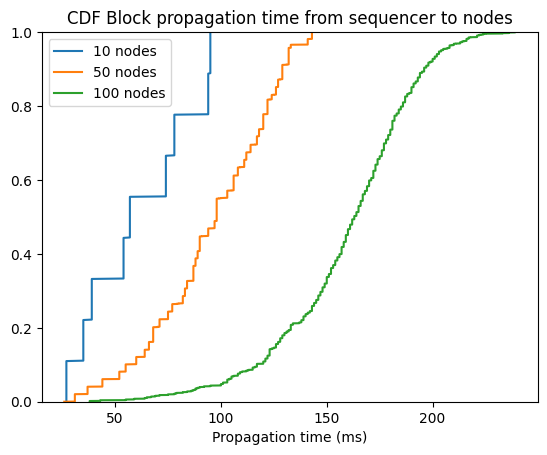

In [126]:
fig1, ax1 = plt.subplots()


for key in op_df_nodes:

    vsdf = op_df_nodes[key].loc[(op_df_nodes[key]['type'] == 'BlockGossipOperation')]

    x = np.sort(vsdf['completion_time'])
    N = vsdf['completion_time'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax1.plot(x, y,label=key)

#ax1.set_xlim([0,200])
ax1.legend()
ax1.set_ylim([0,1])

ax1.set_title("CDF Block propagation time from sequencer to nodes")
ax1.set_xlabel("Propagation time (ms)")

In this graph we observe the CDF for the number of hops a block uses to go from the sequencer to a specific node (it just counts the first copy received)

Text(0.5, 0, 'Propagation time (ms)')

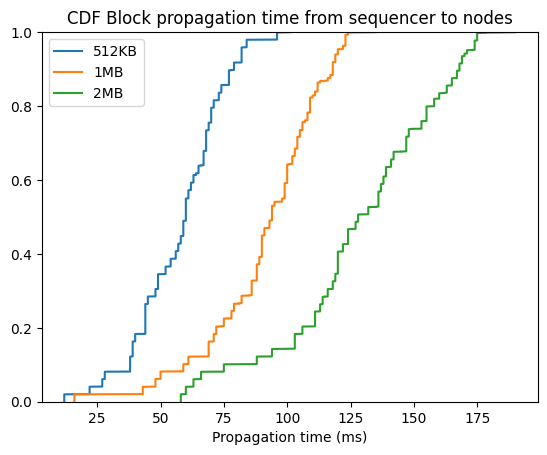

In [111]:
fig3, ax3 = plt.subplots()


for key in op_size_df:

    vsdf = op_size_df[key].loc[(op_size_df[key]['type'] == 'BlockGossipOperation')]

    x = np.sort(vsdf['completion_time'])
    N = vsdf['completion_time'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax3.plot(x, y,label=key)

#ax3.set_xlim([0,200])
ax3.legend()
ax3.set_ylim([0,1])

ax3.set_title("CDF Block propagation time from sequencer to nodes")
ax3.set_xlabel("Propagation time (ms)")

Text(0.5, 0, 'Propagation time (ms)')

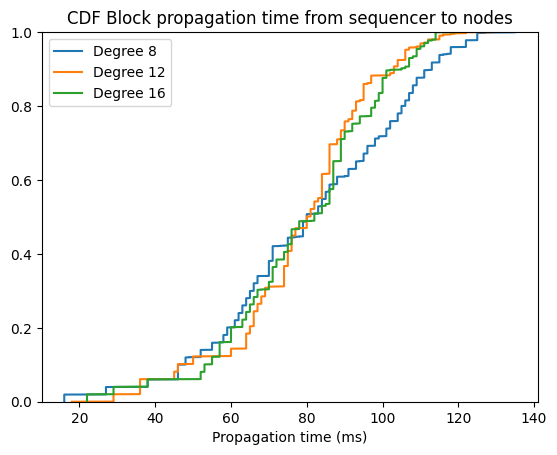

In [112]:
fig3, ax3 = plt.subplots()


for key in op_degree_df:

    vsdf = op_degree_df[key].loc[(op_degree_df[key]['type'] == 'BlockGossipOperation')]

    x = np.sort(vsdf['completion_time'])
    N = vsdf['completion_time'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax3.plot(x, y,label=key)

#ax3.set_xlim([0,600])
ax3.legend()
ax3.set_ylim([0,1])

ax3.set_title("CDF Block propagation time from sequencer to nodes")
ax3.set_xlabel("Propagation time (ms)")

Text(0.5, 0, 'Propagation time (ms)')

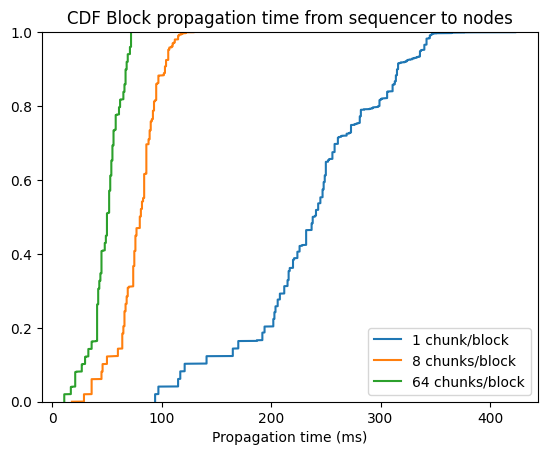

In [113]:
fig3, ax3 = plt.subplots()


for key in op_chunks_df:

    vsdf = op_chunks_df[key].loc[(op_chunks_df[key]['type'] == 'BlockGossipOperation')]

    x = np.sort(vsdf['completion_time'])
    N = vsdf['completion_time'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax3.plot(x, y,label=key)

#ax3.set_xlim([0,600])
ax3.legend()
ax3.set_ylim([0,1])

ax3.set_title("CDF Block propagation time from sequencer to nodes")
ax3.set_xlabel("Propagation time (ms)")

Text(0.5, 0, '# hops')

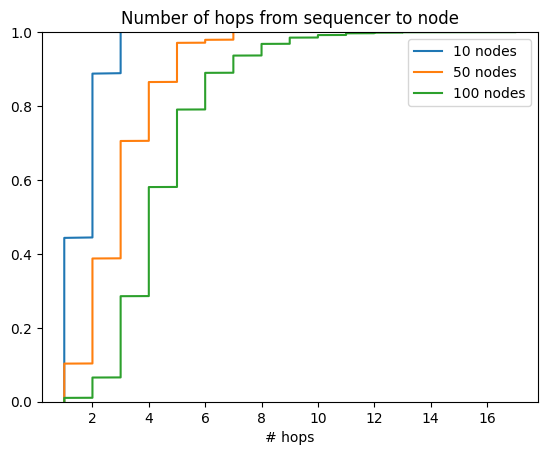

In [128]:
fig8, ax8 = plt.subplots()

for key in op_df_nodes:

    vsdf = op_df_nodes[key].loc[(op_df_nodes[key]['type'] == 'BlockGossipOperation')]

    x = np.sort(vsdf['hops'])
    N = vsdf['hops'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax8.plot(x, y,label=key)

ax8.legend()
#ax8.set_xlim([0,10])
ax8.set_ylim([0,1])

ax8.set_title("Number of hops from sequencer to node")
ax8.set_xlabel("# hops")

Text(0, 0.5, 'Propagation time (ms)')

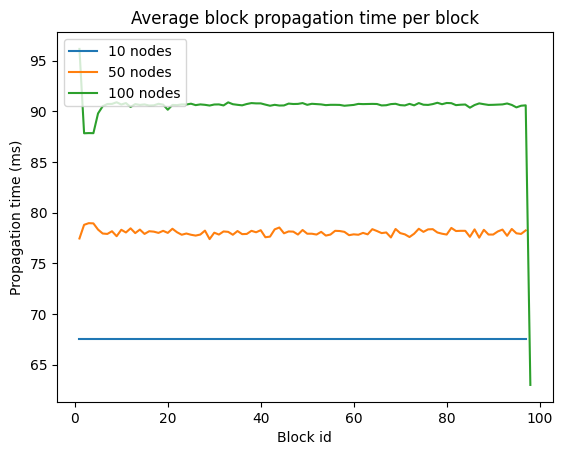

In [115]:
fig4, ax4 = plt.subplots()

for key in op_df_nodes:

    rsdf = op_df_nodes[key].loc[(op_df_nodes[key]['type'] == 'BlockGossipOperation')]
    x = rsdf['block_id'].unique()
    
    avg = []
    for i in x:
        avg.append(rsdf.loc[(rsdf['block_id'] == i)]['completion_time'].mean())

    ax4.plot(x, avg,label=key)
    
    #print(x)
    #print(avg)

ax4.legend()
#ax4.set_xlim([0,15])
#ax4.set_ylim([0,1])

ax4.set_title("Average block propagation time per block")
ax4.set_xlabel("Block id")
ax4.set_ylabel("Propagation time (ms)")

Text(0, 0.5, 'Propagation time (ms)')

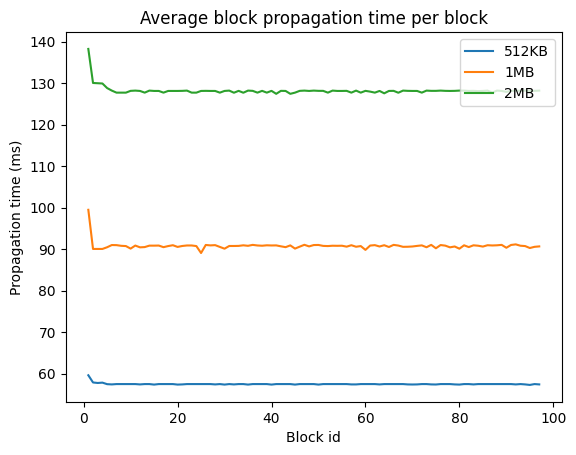

In [116]:
fig4, ax4 = plt.subplots()

for key in op_size_df:

    rsdf = op_size_df[key].loc[(op_size_df[key]['type'] == 'BlockGossipOperation')]
    x = rsdf['block_id'].unique()
    
    avg = []
    for i in x:
        avg.append(rsdf.loc[(rsdf['block_id'] == i)]['completion_time'].mean())

    ax4.plot(x, avg,label=key)
    
    #print(x)
    #print(avg)

ax4.legend()
#ax4.set_xlim([0,15])
#ax4.set_ylim([0,1])

ax4.set_title("Average block propagation time per block")
ax4.set_xlabel("Block id")
ax4.set_ylabel("Propagation time (ms)")

Text(0, 0.5, 'Propagation time (ms)')

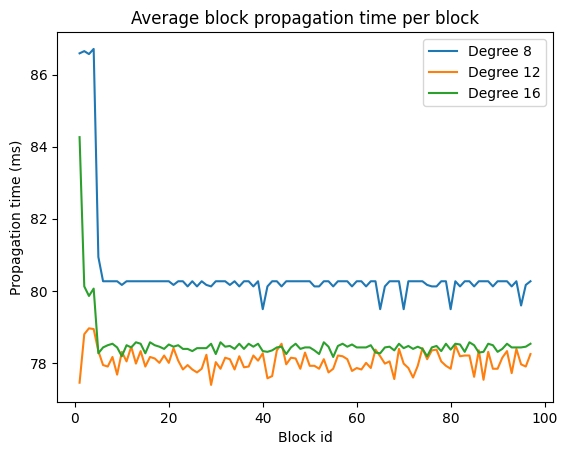

In [117]:
fig4, ax4 = plt.subplots()

for key in op_degree_df:

    rsdf = op_degree_df[key].loc[(op_degree_df[key]['type'] == 'BlockGossipOperation')]
    x = rsdf['block_id'].unique()
    
    avg = []
    for i in x:
        avg.append(rsdf.loc[(rsdf['block_id'] == i)]['completion_time'].mean())

    ax4.plot(x, avg,label=key)
    
    #print(x)
    #print(avg)

ax4.legend()
#ax4.set_xlim([0,15])
#ax4.set_ylim([0,1])

ax4.set_title("Average block propagation time per block")
ax4.set_xlabel("Block id")
ax4.set_ylabel("Propagation time (ms)")

Text(0, 0.5, '#Blocks')

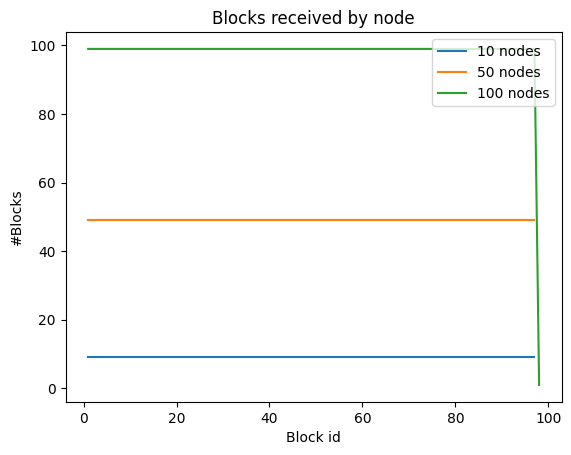

In [118]:
fig4, ax4 = plt.subplots()

for key in op_df_nodes:

    rsdf = op_df_nodes[key].loc[(op_df_nodes[key]['type'] == 'BlockGossipOperation')]
    x = rsdf['block_id'].unique()
    
    avg = []
    for i in x:
        avg.append(rsdf.loc[(rsdf['block_id'] == i)]['completion_time'].count())

    ax4.plot(x, avg,label=key)
    
    #print(x)
    #print(avg)

ax4.legend()
#ax4.set_xlim([0,15])
#ax4.set_ylim([0,1])

ax4.set_title("Blocks received by node")
ax4.set_xlabel("Block id")
ax4.set_ylabel("#Blocks")

Text(0.5, 0, '# replicates received per block')

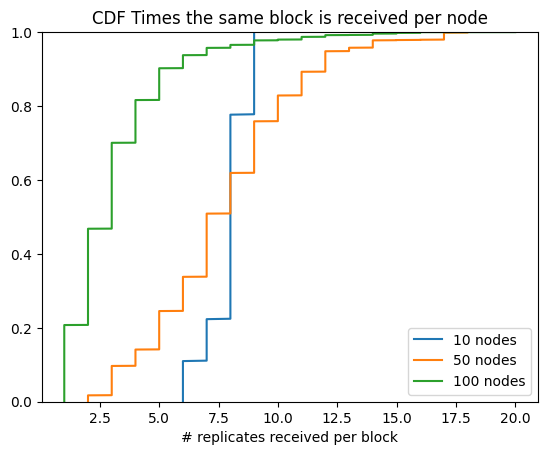

In [129]:
fig4, ax4 = plt.subplots()

for key in op_df_nodes:

    rsdf = op_df_nodes[key].loc[(op_df_nodes[key]['type'] == 'BlockGossipOperation')]

    x = np.sort(rsdf['num_messages'])
    N = rsdf['num_messages'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax4.plot(x, y,label=key)

ax4.legend()
#ax4.set_xlim([0,15])
ax4.set_ylim([0,1])

ax4.set_title("CDF Times the same block is received per node")
ax4.set_xlabel("# replicates received per block")